# Dense network
## Answer:
## 1. 1-layer dense network: 94%
## 2. 2-layer dense network: 94%

# 1. Import necessary library and datasets.

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import activations
from tensorflow.keras import initializers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
import tensorflow.keras as keras

from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import PIL.Image as Image
import matplotlib.pyplot as plt

with np.load('trainfeature.npz', allow_pickle=False) as npz_file:
    traindata = dict(npz_file.items())

X_tr = traindata['features']
y_tr = traindata['targets']

with np.load('validfeature.npz', allow_pickle=False) as npz_file:
    validdata = dict(npz_file.items())

X_va = validdata['features']
y_va = validdata['targets']

with np.load('testfeature.npz', allow_pickle=False) as npz_file:
    testdata = dict(npz_file.items())

X_te = testdata['features']
y_te = testdata['targets']

# 2. 1-layer dense network
## Test loss: 0.24
## Test accuracy: 94.00%

In [2]:
# Create model
model = Sequential()

# Output layer with six output nodes with extracted feature size of 1280
model.add(Dense(units=6, activation=activations.softmax, input_dim=1280,
    kernel_initializer=initializers.VarianceScaling(scale=1.0, seed=0)))
model.summary()

# Define loss function, optimizer, and metrics to track during training
model.compile(
    optimizer='sgd', # .. or optimizers.SGD(lr=0.01)
    loss='sparse_categorical_crossentropy', # .. or losses.sparse_categorical_crossentropy
    metrics=['acc'] # .. or metrics.sparse_categorical_accuracy
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 7686      
Total params: 7,686
Trainable params: 7,686
Non-trainable params: 0
_________________________________________________________________


In [3]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)

history = model.fit(
    x=X_tr, y=y_tr, batch_size=32, epochs=200,
    shuffle=True, validation_data=(X_va, y_va), callbacks=[early_stopping] # Shuffle training samples
)

Train on 280 samples, validate on 139 samples
Epoch 1/200
280/280 [==============================] - 0s 445us/step - loss: 1.4397 - acc: 0.4786 - val_loss: 1.0271 - val_acc: 0.7698
Epoch 2/200
280/280 [==============================] - 0s 39us/step - loss: 0.8666 - acc: 0.8000 - val_loss: 0.7425 - val_acc: 0.8129
Epoch 3/200
280/280 [==============================] - 0s 53us/step - loss: 0.6414 - acc: 0.8464 - val_loss: 0.5999 - val_acc: 0.8561
Epoch 4/200
280/280 [==============================] - 0s 43us/step - loss: 0.5181 - acc: 0.8750 - val_loss: 0.5240 - val_acc: 0.8705
Epoch 5/200
280/280 [==============================] - 0s 53us/step - loss: 0.4375 - acc: 0.9143 - val_loss: 0.4673 - val_acc: 0.8705
Epoch 6/200
280/280 [==============================] - 0s 39us/step - loss: 0.3830 - acc: 0.9250 - val_loss: 0.4314 - val_acc: 0.8633
Epoch 7/200
280/280 [==============================] - 0s 53us/step - loss: 0.3426 - acc: 0.9286 - val_loss: 0.4041 - val_acc: 0.8705
Epoch 8/200
280

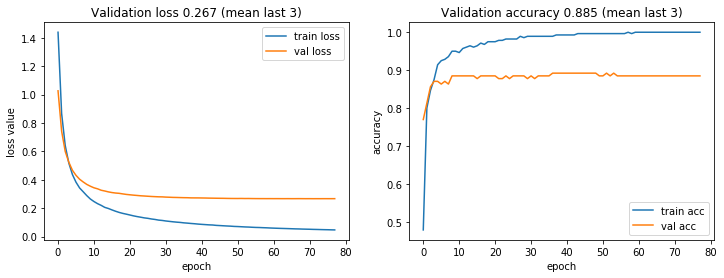

50/50 [==============================] - 0s 40us/step
Test loss: 0.24
Test accuracy: 94.00%


In [4]:
# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot accuracy values
ax1.plot(history.history['loss'], label='train loss')
ax1.plot(history.history['val_loss'], label='val loss')
ax1.set_title('Validation loss {:.3f} (mean last 3)'.format(
    np.mean(history.history['val_loss'][-3:]) # last three values
))
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss value')
ax1.legend()

# Plot accuracy values
ax2.plot(history.history['acc'], label='train acc')
ax2.plot(history.history['val_acc'], label='val acc')
ax2.set_title('Validation accuracy {:.3f} (mean last 3)'.format(
    np.mean(history.history['val_acc'][-3:]) # last three values
))
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend()
plt.show()

(test_loss, test_accuracy) = model.evaluate(X_te, y_te, batch_size=32)

print('Test loss: {:.2f}'.format(test_loss))
print('Test accuracy: {:.2f}%'.format(100*test_accuracy)) 

# 3. 2-layer dense network
## Test loss: 0.26
## Test accuracy: 94.00%

In [5]:
# Create model
model2 = Sequential()

# Hidden layer with 32 nodes
model2.add(Dense(units=32, activation=activations.relu, input_dim=1280,
    kernel_initializer=initializers.VarianceScaling(scale=2.0, seed=0)))

# Output layer with 6 ouputs
model2.add(Dense(
    units=6, activation=activations.softmax,
    kernel_initializer=initializers.VarianceScaling(scale=1.0, seed=0)))
model2.summary()

# Define loss function, optimizer, and metrics to track during training
model2.compile(
    optimizer='sgd', # .. or optimizers.SGD(lr=0.01)
    loss='sparse_categorical_crossentropy', # .. or losses.sparse_categorical_crossentropy
    metrics=['acc'] # .. or metrics.sparse_categorical_accuracy
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                40992     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total params: 41,190
Trainable params: 41,190
Non-trainable params: 0
_________________________________________________________________


In [6]:
history2 = model2.fit(
    x=X_tr, y=y_tr,batch_size=32, epochs=200,
    shuffle=True, validation_data=(X_va, y_va), callbacks=[early_stopping]
)

Train on 280 samples, validate on 139 samples
Epoch 1/200
280/280 [==============================] - 0s 541us/step - loss: 1.7053 - acc: 0.3464 - val_loss: 1.4441 - val_acc: 0.5252
Epoch 2/200
280/280 [==============================] - 0s 61us/step - loss: 1.2543 - acc: 0.6179 - val_loss: 1.1365 - val_acc: 0.6475
Epoch 3/200
280/280 [==============================] - 0s 61us/step - loss: 0.9972 - acc: 0.7536 - val_loss: 0.9406 - val_acc: 0.7410
Epoch 4/200
280/280 [==============================] - 0s 64us/step - loss: 0.8257 - acc: 0.8179 - val_loss: 0.8017 - val_acc: 0.8201
Epoch 5/200
280/280 [==============================] - 0s 50us/step - loss: 0.6965 - acc: 0.8500 - val_loss: 0.7069 - val_acc: 0.8489
Epoch 6/200
280/280 [==============================] - 0s 64us/step - loss: 0.6060 - acc: 0.8607 - val_loss: 0.6304 - val_acc: 0.8417
Epoch 7/200
280/280 [==============================] - 0s 43us/step - loss: 0.5335 - acc: 0.8714 - val_loss: 0.5746 - val_acc: 0.8561
Epoch 8/200
280

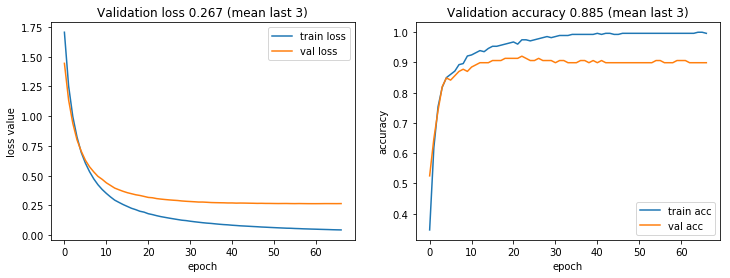

50/50 [==============================] - 0s 60us/step
Test loss: 0.25
Test accuracy: 94.00%


In [7]:
# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot accuracy values
ax1.plot(history2.history['loss'], label='train loss')
ax1.plot(history2.history['val_loss'], label='val loss')
ax1.set_title('Validation loss {:.3f} (mean last 3)'.format(
    np.mean(history.history['val_loss'][-3:]) # last three values
))
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss value')
ax1.legend()

# Plot accuracy values
ax2.plot(history2.history['acc'], label='train acc')
ax2.plot(history2.history['val_acc'], label='val acc')
ax2.set_title('Validation accuracy {:.3f} (mean last 3)'.format(
    np.mean(history.history['val_acc'][-3:]) # last three values
))
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend()
plt.show()


(test_loss2, test_accuracy2) = model2.evaluate(X_te, y_te, batch_size=32)

print('Test loss: {:.2f}'.format(test_loss2))
print('Test accuracy: {:.2f}%'.format(100*test_accuracy2)) 